# CS 4820
# Tutorial 4: More on Keras

### 0. Dataset

We are going to use the same `circles` dataset that we've seen before.

In [1]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000,
                    noise=0.1,
                    factor=0.2,
                    random_state=0)

import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.legend(['0', '1'])
plt.title("Blue circles and Red crosses");

### 1. Keras

[Keras](https://keras.io/) is the Deep Learning model definition API we will use throughout the course. It's modular, well designed, and it has been integrated by both Google and Microsoft to serve as the high-level API for their Deep Learning libraries (if you are not familiar with APIs, you may have a look on [Wikipedia](https://en.wikipedia.org/wiki/Application_programming_interface)).

As explained earlier, [Tensorflow](https://www.tensorflow.org/) adopted Keras as the default model specification API starting from the recent 2.0 release. For this reason, we decided to use its syntax throughout the course.

> TIP: Do not worry about understanding every line of code of what follows. The rest of the course walks you through how to use Keras and [Tensorflow](https://www.tensorflow.org/) (the most popular open-source Deep Learning library, developed by Google), and so I'm not going to explain every detail here.
> Here we're going to demonstrate an overview of _how_ to use Keras, and we'll describe more features as the course progresses.

To train a model to tell the difference between red crosses and blue dots above, we have to perform the following steps:

1. Define our Neural Network structure; this is going to be our model.
2. Train the model on our data.
3. Check that the model has correctly learned to separate the red crosses from the blue dots.

> TIP: If this is the first time you train a Machine Learning model, do not worry, we will repeat these steps many times throughout the course, and we'll have plenty of opportunities to familiarize ourselves with them.

Let's start by importing a few libraries:

In [56]:
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

Let's start with step one: defining a Neural Network model. The next four lines are all that's necessary to do just that. 

`Keras` will interpret those lines and behind the scenes create a model in `Tensorflow`. We may have noticed that the above cells informed us that Keras is "Using Tensorflow backend". Keras is just a high-level API specification that can work with several back-ends. For this course, we will use it with the Tensorflow library as back-end.

The Neural Network below will take two inputs (the horizontal and vertical position of a data point in the plot above) and return a single value: the probability that the value belongs to the "Red Crosses" in the inner circle.

Let's build it!

We start by creating an empty shell for our model. We do this using the `Sequential` class, which tells Keras that we are planning to build our model sequentially, adding one component at a time. So we will start by declaring the model to be a sequential model and then we will proceed to add layers to the model.

> TIP: Keras also offers a functional API to build models. It is a bit more complicated and we will introduce it later in the course. Most of the models in this course will be created using the Sequential API.

In [57]:
model = Sequential()

The next step is to add components to our model. We won't explain the meaning of each of these lines now, except pointing your attention to 2 facts:

1. We are specifying the input shape of our model `input_shape=(2,)` in the first line below so that our model will expect two input values for each data point.
2. We have one output value only which will give us the predicted probability for a point to be a blue dot or a red cross. This is specified by the number `1` in the second line below.

In [58]:
model.add(Dense(4, input_shape=(2,), activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

Finally, we need to compile the model, which will communicate to our backend (Tensorflow) the model structure and how it will learn from examples. Again, don't worry about knowing what optimizer and loss function mean, we'll have plenty of time to understand those.

In [59]:
model.compile(optimizer=SGD(lr=0.5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

Defining the model is like creating an empty box ready to receive data of a specific shape. We can think of it like wiring up an electric circuit or setting up a pipe. To obtain predictions from it, we'll need to feed some example data (i.e., flow electricity through the circuit or water through the pipeline). When this happens, the model will learn general rules to formulate accurate predictions. In the present case, this means the model will learn to separate the red crosses from the blue dots. 

To train a model we use the `fit` method. We'll discuss this in great detail in the chapter on Machine Learning.

In [62]:
model.fit(X, y, epochs=10);

Epoch 1/10
1000/1000 [==============================] - 0s 30us/sample - loss: 0.6432 - accuracy: 0.7050
Epoch 2/10
1000/1000 [==============================] - 0s 25us/sample - loss: 0.5470 - accuracy: 0.8130
Epoch 3/10
1000/1000 [==============================] - 0s 25us/sample - loss: 0.4311 - accuracy: 0.8660
Epoch 4/10
1000/1000 [==============================] - 0s 23us/sample - loss: 0.3259 - accuracy: 0.9130
Epoch 5/10
1000/1000 [==============================] - 0s 22us/sample - loss: 0.2288 - accuracy: 0.9740
Epoch 6/10
1000/1000 [==============================] - 0s 23us/sample - loss: 0.1609 - accuracy: 0.9990
Epoch 7/10
1000/1000 [==============================] - 0s 23us/sample - loss: 0.1204 - accuracy: 1.0000
Epoch 8/10
1000/1000 [==============================] - 0s 23us/sample - loss: 0.0952 - accuracy: 1.0000
Epoch 9/10
1000/1000 [==============================] - 0s 23us/sample - loss: 0.0783 - accuracy: 1.0000
Epoch 10/10
1000/1000 [==============================] 

The fit function just ran 20 *rounds* or *passes* over our data. Each *round* is called an *epoch*. At each epoch, we flow our data through the Neural Network and compare the known labels with the predictions from the network and measure how accurate our net was.

After 20 iterations the accuracy of our model is 1 or close to 1, meaning it predicted 100% (or close to 100%) of the test cases correctly.

### 2. Decision Boundary

Now that our model is well trained, we can feed it with any pair of numbers and it will generate a prediction for the probability that a point situated on the 2D plane at those coordinates belongs to the group of red crosses. 

In other words, now that we have a trained model, we can ask for the probability to be in the group of "red crosses" for any point in the 2D plane. This is great because we can see if it has correctly learned to draw a boundary between red crosses and blue dots. One way to calculate this is to define a grid on the 2D plane and calculate the probability predicted by the model for any point on this grid. Let's do it.

> TIP: Don't worry if you don't yet understand everything in the following code. It is ok if you get a general idea.

Our data varies roughly between `-1.5` and `1.5` along both axes, so let's build a grid of equally spaced horizontal lines and vertical lines between these two extremes. 

We will start by building two arrays of equally spaced points between the `-1.5` and `1.5`. The `np.linspace` function does just that.

In [8]:
hticks = np.linspace(-1.5, 1.5, 101)
vticks = np.linspace(-1.5, 1.5, 101)

In [9]:
hticks[:10]

array([-1.5 , -1.47, -1.44, -1.41, -1.38, -1.35, -1.32, -1.29, -1.26,
       -1.23])

Now let's build a grid with all the possible pairs of points from `hticks` and `vticks`. The function `np.meshgrid` does that.

In [10]:
aa, bb = np.meshgrid(hticks, vticks)

In [11]:
aa.shape

(101, 101)

In [12]:
aa

array([[-1.5 , -1.47, -1.44, ...,  1.44,  1.47,  1.5 ],
       [-1.5 , -1.47, -1.44, ...,  1.44,  1.47,  1.5 ],
       [-1.5 , -1.47, -1.44, ...,  1.44,  1.47,  1.5 ],
       ...,
       [-1.5 , -1.47, -1.44, ...,  1.44,  1.47,  1.5 ],
       [-1.5 , -1.47, -1.44, ...,  1.44,  1.47,  1.5 ],
       [-1.5 , -1.47, -1.44, ...,  1.44,  1.47,  1.5 ]])

In [13]:
bb

array([[-1.5 , -1.5 , -1.5 , ..., -1.5 , -1.5 , -1.5 ],
       [-1.47, -1.47, -1.47, ..., -1.47, -1.47, -1.47],
       [-1.44, -1.44, -1.44, ..., -1.44, -1.44, -1.44],
       ...,
       [ 1.44,  1.44,  1.44, ...,  1.44,  1.44,  1.44],
       [ 1.47,  1.47,  1.47, ...,  1.47,  1.47,  1.47],
       [ 1.5 ,  1.5 ,  1.5 , ...,  1.5 ,  1.5 ,  1.5 ]])

`aa` and `bb` contain the points of the grid, we can visualize them:

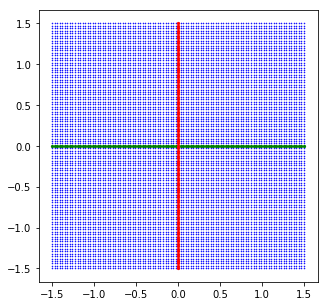

In [14]:
plt.figure(figsize=(5, 5))
plt.scatter(aa, bb, s=0.3, color='blue')
# highlight one horizontal series of grid points
plt.scatter(aa[50], bb[50], s=5, color='green')
# highlight one vertical series of grid points
plt.scatter(aa[:, 50], bb[:, 50], s=5, color='red');

The model expects a pair of values for each data point, so we have to re-arrange `aa` and `bb` into a single array with two columns. 

The `ravel` function flattens an N-dimensional array to a 1D array, and the `np.c_` class will help us combine `aa` and `bb` into a single 2D array.

In [15]:
ab = np.c_[aa.ravel(), bb.ravel()]

We can check that the shape of the array is correct:

In [16]:
ab.shape

(10201, 2)

We have created an array with `10201` rows and two columns, these are all the points on the grid we drew above. Now we can pass it to the model and obtain a probability prediction for each position in the grid.

In [17]:
c = model.predict(ab)

In [18]:
c

array([[1.0102987e-05],
       [1.0102987e-05],
       [9.9241734e-06],
       ...,
       [3.6850542e-02],
       [3.6853015e-02],
       [3.6855422e-02]], dtype=float32)

Great! We have predictions from our model for all points on the grid, and they are all values between 0 and 1. 

Let's check to make sure that they are, in fact between 0 and 1 by checking the minimum and maximum values:

In [19]:
c.min()

9.924173e-06

In [20]:
c.max()

0.9896151

Let's reshape `c` so that it has the same shape as `aa` and `bb`. We need to do this so that we will be able to use it to control the size of each dot in the next plot.

In [21]:
c.shape

(10201, 1)

In [22]:
cc = c.reshape(aa.shape)
cc.shape

(101, 101)

Let's see what they look like! We will redraw the grid, making the size of each dot proportional to the probability predicted by the model that that point belongs to the group of red crosses.

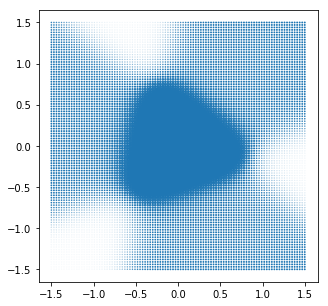

In [23]:
plt.figure(figsize=(5, 5))
plt.scatter(aa, bb, s=20*cc);

Nice! We see that a dense cloud of points with high probability is in the central region of the plot, exactly where our red crosses are. We can draw the same data in a more appealing way using the `plt.contourf` function with appropriate colors and transparency:

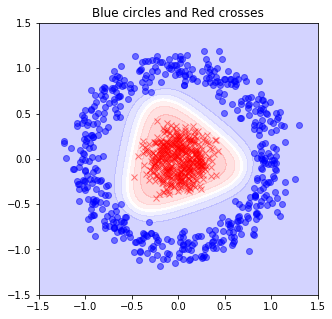

In [24]:
plt.figure(figsize=(5, 5))
plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.title("Blue circles and Red crosses");

The last plot clearly shows the decision boundary of our model, i.e., the curve that delimits the area predicted to be red crosses VS the region predicted to be blue dots.

Our model learned to distinguish the two classes correctly, which is promising, even if the current example was elementary.

__The Decision boundary code above could be encapsulated in a function.__

In [46]:
def plot_decision_boundary(model, X, y):
    hticks = np.linspace(X.min()-0.1, X.max()+0.1, 101)
    vticks = np.linspace(X.min()-0.1, X.max()+0.1, 101)
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    c = model.predict(ab)
    cc = c.reshape(aa.shape)
    
    plt.figure(figsize=(7, 7))
    plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)

    plt.title("Blue circles and Red crosses");

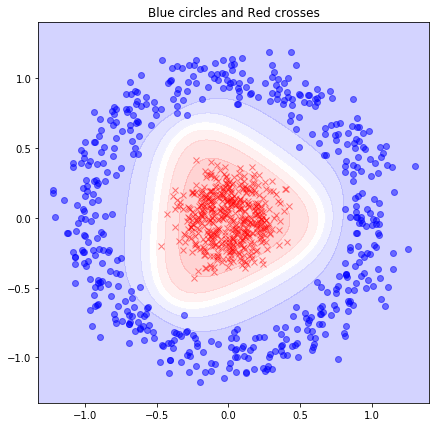

In [63]:
plot_decision_boundary(model, X, y)

plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)

Note: You may change the model and/or the number of epochs such that it fails to learn well. Then plot the decision boundary again to see the results.